In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write(userdata.get('KAGGLE_JSON'))
!chmod 600 ~/.kaggle/kaggle.json
print("✅ Archivo kaggle.json configurado de forma segura.")

✅ Archivo kaggle.json configurado de forma segura.


In [ ]:
!kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
sales-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -o sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [ ]:
df = pd.read_csv("train.csv")
print("Dataset cargado exitosamente:")
df.head()

Dataset cargado exitosamente:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
nuevos_nombres = {
    'Row ID': 'ID_Fila',
    'Order ID': 'ID_Pedido',
    'Order Date': 'Fecha_Pedido',
    'Ship Date': 'Fecha_Envio',
    'Ship Mode': 'Modo_Envio',
    'Customer ID': 'ID_Cliente',
    'Customer Name': 'Nombre_Cliente',
    'Segment': 'Segmento',
    'Country': 'Pais',
    'City': 'Ciudad',
    'State': 'Estado',
    'Postal Code': 'Codigo_Postal',
    'Region': 'Region',
    'Product ID': 'ID_Producto',
    'Category': 'Categoria',
    'Sub-Category': 'Sub_Categoria',
    'Product Name': 'Nombre_Producto',
    'Sales': 'Ventas'
}

df = df.rename(columns=nuevos_nombres)

# Verificar
print(df.columns)

Index(['ID_Fila', 'ID_Pedido', 'Fecha_Pedido', 'Fecha_Envio', 'Modo_Envio',
       'ID_Cliente', 'Nombre_Cliente', 'Segmento', 'Pais', 'Ciudad', 'Estado',
       'Codigo_Postal', 'Region', 'ID_Producto', 'Categoria', 'Sub_Categoria',
       'Nombre_Producto', 'Ventas'],
      dtype='object')


In [ ]:
valores_unicos = df['Nombre_Producto'].unique()
print(valores_unicos)

['Bush Somerset Collection Bookcase'
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back'
 'Self-Adhesive Address Labels for Typewriters by Universal' ...
 'Cisco 8961 IP Phone Charcoal' 'Eureka Hand Vacuum, Bagless' 'LG G2']


In [ ]:
df.columns

Index(['ID_Fila', 'ID_Pedido', 'Fecha_Pedido', 'Fecha_Envio', 'Modo_Envio',
       'ID_Cliente', 'Nombre_Cliente', 'Segmento', 'Pais', 'Ciudad', 'Estado',
       'Codigo_Postal', 'Region', 'ID_Producto', 'Categoria', 'Sub_Categoria',
       'Nombre_Producto', 'Ventas'],
      dtype='object')

In [ ]:
cantidad_productos = len(df['Nombre_Producto'].unique())
print(f"Tienes {cantidad_productos} productos únicos.")

Tienes 1849 productos únicos.


In [ ]:
# Ver los valores únicos en inglés
valores_unicos = df['Categoria'].unique()
print(valores_unicos)

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
# 1. Crear el diccionario de traducción
traduccion_categorias = {
    'Furniture': 'Muebles',
    'Office Supplies': 'Material de Oficina',
    'Technology': 'Tecnología'
}

# 2. Reemplazar los valores en la columna usando .replace()
df['Categoria'] = df['Categoria'].replace(traduccion_categorias)

# 3. Verificar que cambió
print(df['Categoria'].unique())

['Muebles' 'Material de Oficina' 'Tecnología']


In [ ]:
traduccion_subcategorias = {
    'Bookcases': 'Libreros',
    'Chairs': 'Sillas',
    'Labels': 'Etiquetas',
    'Tables': 'Mesas',
    'Storage': 'Almacenamiento',
    'Furnishings': 'Mobiliario',
    'Art': 'Arte',
    'Phones': 'Teléfonos',
    'Binders': 'Carpetas',
    'Appliances': 'Electrodomésticos',
    'Paper': 'Papel',
    'Accessories': 'Accesorios',
    'Envelopes': 'Sobres',
    'Fasteners': 'Sujetadores',
    'Supplies': 'Suministros',
    'Machines': 'Máquinas',
    'Copiers': 'Copiadoras'
}

# Aplicar a la columna de sub-categoría
df['Sub_Categoria'] = df['Sub_Categoria'].replace(traduccion_subcategorias)

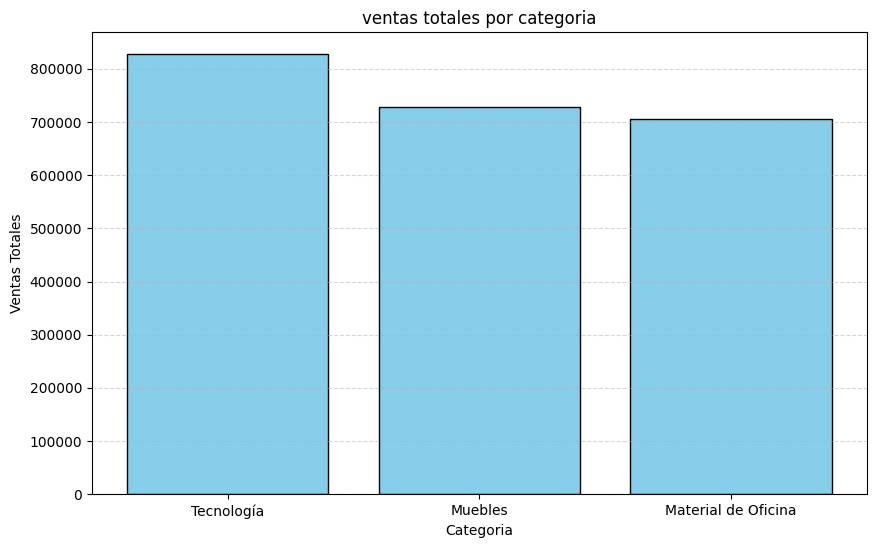

In [ ]:
ventas_por_categoria= df.groupby('Categoria')['Ventas'].sum().sort_values(ascending=False)
ventas_por_categoria

plt.figure(figsize=(10,6))
plt.bar(ventas_por_categoria.index, ventas_por_categoria.values, color="skyblue", edgecolor="black")
plt.title("ventas totales por categoria")
plt.xlabel("Categoria")
plt.ylabel("Ventas Totales")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
total_ventas = df['Ventas'].sum()
total_pedidos = df['ID_Pedido'].nunique() # Contamos pedidos únicos, no filas

ticket_promedio = total_ventas / total_pedidos

print(f"Ventas Totales: ${total_ventas:,.2f}")
print(f"Ticket Promedio: ${ticket_promedio:,.2f}")

Ventas Totales: $2,261,536.78
Ticket Promedio: $459.48


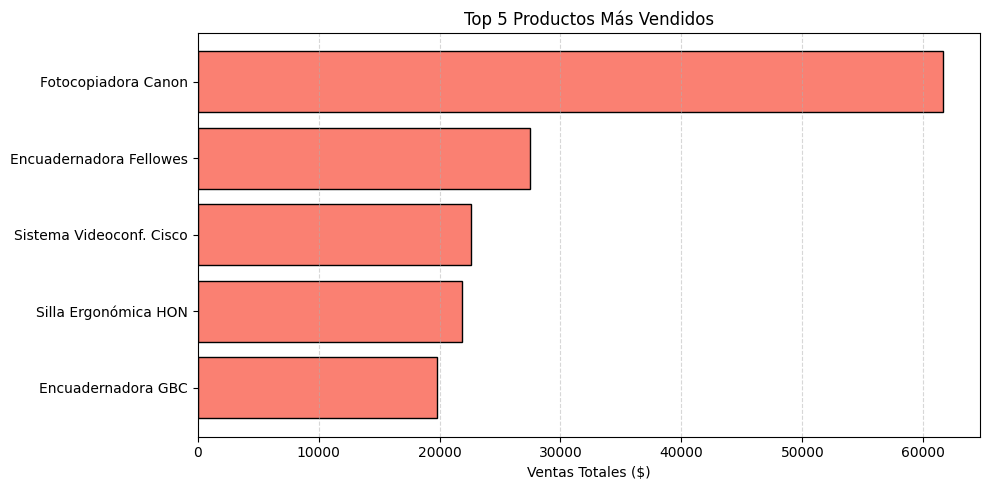

In [ ]:
top_5 = df.groupby('Nombre_Producto')['Ventas'].sum().sort_values(ascending=False).head(5)

nombres_claros = {
    'Canon imageCLASS 2200 Advanced Copier': 'Fotocopiadora Canon',
    'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind': 'Encuadernadora Fellowes',
    'Cisco TelePresence System EX90 Videoconferencing Unit': 'Sistema Videoconf. Cisco',
    'HON 5400 Series Task Chairs for Big and Tall': 'Silla Ergonómica HON',
    'GBC DocuBind TL300 Electric Binding System': 'Encuadernadora GBC'
}

top_5 = top_5.rename(index=nombres_claros)

plt.figure(figsize=(10, 5))
plt.barh(top_5.index, top_5.values, color='salmon', edgecolor='black')
plt.gca().invert_yaxis()

plt.title("Top 5 Productos Más Vendidos")
plt.xlabel("Ventas Totales ($)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Asegúrate que la fecha sea tipo datetime
df['Fecha_Pedido'] = pd.to_datetime(df['Fecha_Pedido'], dayfirst= True)

# Crear columnas auxiliares para el análisis
df['Mes'] = df['Fecha_Pedido'].dt.to_period('M') # Ej: 2023-01
df['Dia_Semana'] = df['Fecha_Pedido'].dt.day_name() # Ej: Monday

print(df[['Fecha_Pedido', 'Mes', 'Dia_Semana']].head())

  Fecha_Pedido      Mes Dia_Semana
0   2017-11-08  2017-11  Wednesday
1   2017-11-08  2017-11  Wednesday
2   2017-06-12  2017-06     Monday
3   2016-10-11  2016-10    Tuesday
4   2016-10-11  2016-10    Tuesday


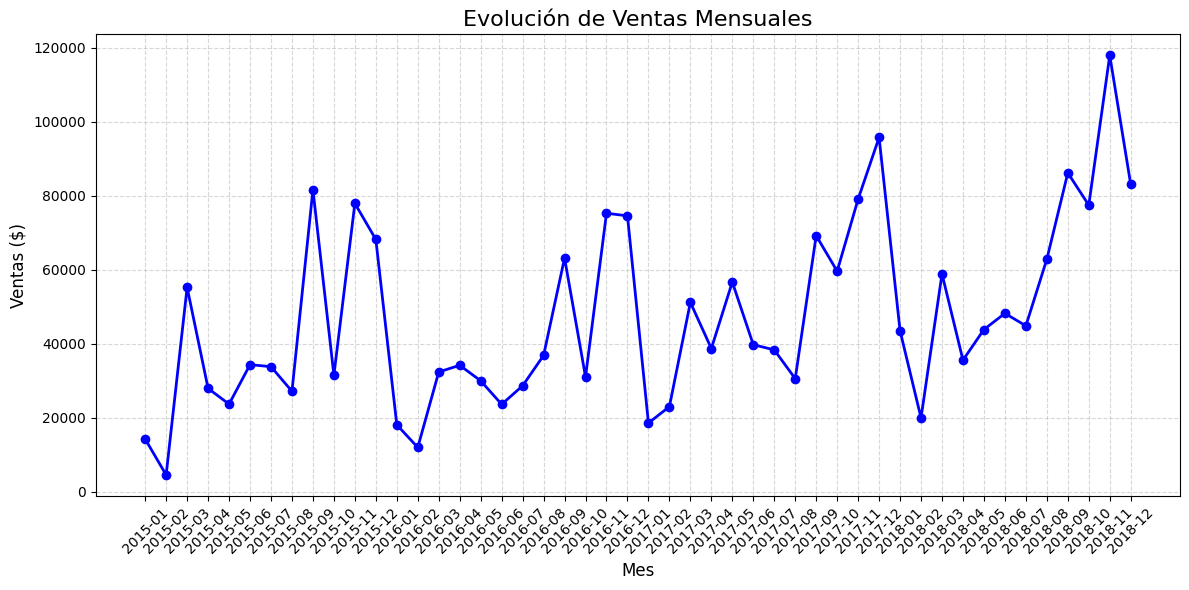

In [ ]:
import matplotlib.pyplot as plt

# 1. Agrupar ventas por Mes
# Nota: Al usar groupby con periodos, a veces es mejor convertir el índice a texto para graficar fácil
ventas_mensuales = df.groupby('Mes')['Ventas'].sum()

# 2. Crear el gráfico
plt.figure(figsize=(12, 6)) # Un poco más ancho para ver bien el tiempo

# Eje X: Los meses (convertidos a string), Eje Y: Las ventas
plt.plot(ventas_mensuales.index.astype(str), ventas_mensuales.values,
         marker='o',       # Pone un puntito en cada mes
         linestyle='-',    # Une los puntos con línea
         color='b',        # Color azul (blue)
         linewidth=2)      # Grosor de la línea

plt.title("Evolución de Ventas Mensuales", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Ventas ($)", fontsize=12)

# Rotar las fechas de abajo para que no se encimen
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5) # Cuadrícula completa
plt.tight_layout()
plt.show()

Primeras filas de la tabla para el gráfico:
Fecha_Pedido         1          2           3           4           5   \
Dia_Semana                                                               
Lunes         16736.742   8627.426  23366.9130  18684.0000  19471.8640   
Martes        30316.715   7575.597  27200.0044  18580.3555  41400.8780   
Miércoles      8946.428   5772.856  57888.9010  16890.9830  12296.1964   
Jueves         4703.498  10573.110   3766.3320  10502.5840  10757.9560   
Viernes        6538.603   4454.318  38538.8120   7376.4796  13878.5980   

Fecha_Pedido          6          7           8           9           10  \
Dia_Semana                                                                
Lunes         22572.2965  20022.369  20314.6048  48359.2130  47168.7710   
Martes        25370.9430  28818.463  34002.6860  59084.7095  35320.4295   
Miércoles     17372.6200  15124.800  28778.2820  44073.2818  25363.2300   
Jueves         7427.8340   7769.443   9505.7880  18298.6610   

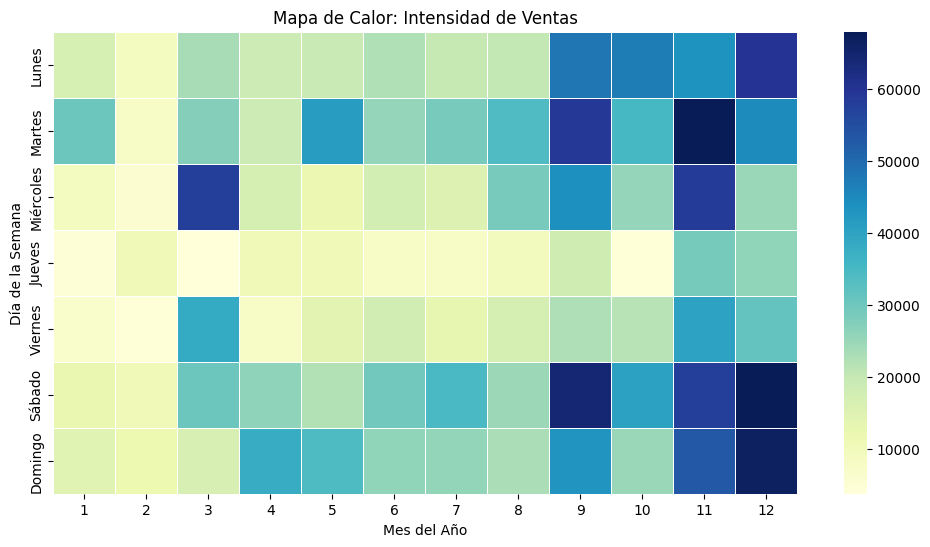

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. REPARAR: Asegurarnos que los días estén en Español sí o sí
dias_traduccion = {
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
}

# Si los datos ya están en español, esto no hará daño. Si están en inglés, los arregla.
# Usamos .replace en lugar de .map para evitar borrar datos si ya estaban traducidos
df['Dia_Semana'] = df['Dia_Semana'].replace(dias_traduccion)

# 2. Crear la tabla pivote de nuevo
tabla_heatmap = df.pivot_table(index='Dia_Semana',
                               columns=df['Fecha_Pedido'].dt.month,
                               values='Ventas',
                               aggfunc='sum')

# 3. Ordenar los días (Ahora sí funcionará porque coinciden los nombres)
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
tabla_heatmap = tabla_heatmap.reindex(orden_dias)

# 4. VERIFICACIÓN: Si esto imprime "NaN", algo sigue mal. Si ves números, ¡éxito!
print("Primeras filas de la tabla para el gráfico:")
print(tabla_heatmap.head())

# 5. Graficar
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_heatmap,
            cmap='YlGnBu',
            annot=False,
            fmt='.0f',
            linewidths=.5)

plt.title("Mapa de Calor: Intensidad de Ventas")
plt.xlabel("Mes del Año")
plt.ylabel("Día de la Semana")
plt.show()

In [ ]:
# 1. Convertir Fecha_Envio a datetime (usando dayfirst=True por seguridad)
df['Fecha_Envio'] = pd.to_datetime(df['Fecha_Envio'], dayfirst=True)

# 2. Crear la nueva columna restando las fechas
# .dt.days convierte el resultado (ej: "4 days") a un número simple (4)
df['Dias_Envio'] = (df['Fecha_Envio'] - df['Fecha_Pedido']).dt.days

# 3. Verificar que funcionó
print(df[['Fecha_Pedido', 'Fecha_Envio', 'Dias_Envio', 'Modo_Envio']].head())

  Fecha_Pedido Fecha_Envio  Dias_Envio      Modo_Envio
0   2017-11-08  2017-11-11           3    Second Class
1   2017-11-08  2017-11-11           3    Second Class
2   2017-06-12  2017-06-16           4    Second Class
3   2016-10-11  2016-10-18           7  Standard Class
4   2016-10-11  2016-10-18           7  Standard Class


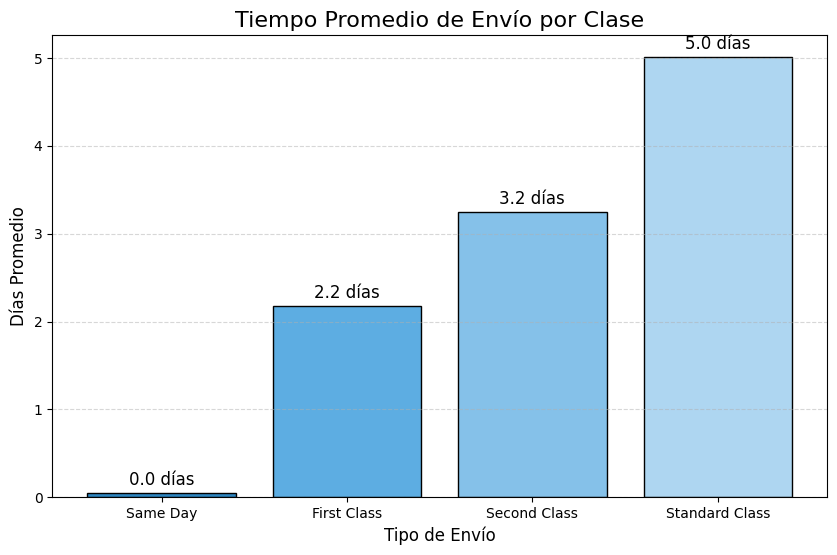

In [ ]:
import matplotlib.pyplot as plt

tiempos_envio = df.groupby('Modo_Envio')['Dias_Envio'].mean().sort_values()

plt.figure(figsize=(10, 6))

# Creamos las barras
barras = plt.bar(tiempos_envio.index, tiempos_envio.values,
                 color=['#2E86C1', '#5DADE2', '#85C1E9', '#AED6F1'], # Azul degradado
                 edgecolor='black')

# 3. Poner la etiqueta con el valor exacto encima de cada barra
plt.bar_label(barras, fmt='%.1f días', padding=3, fontsize=12)

plt.title("Tiempo Promedio de Envío por Clase", fontsize=16)
plt.xlabel("Tipo de Envío", fontsize=12)
plt.ylabel("Días Promedio", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

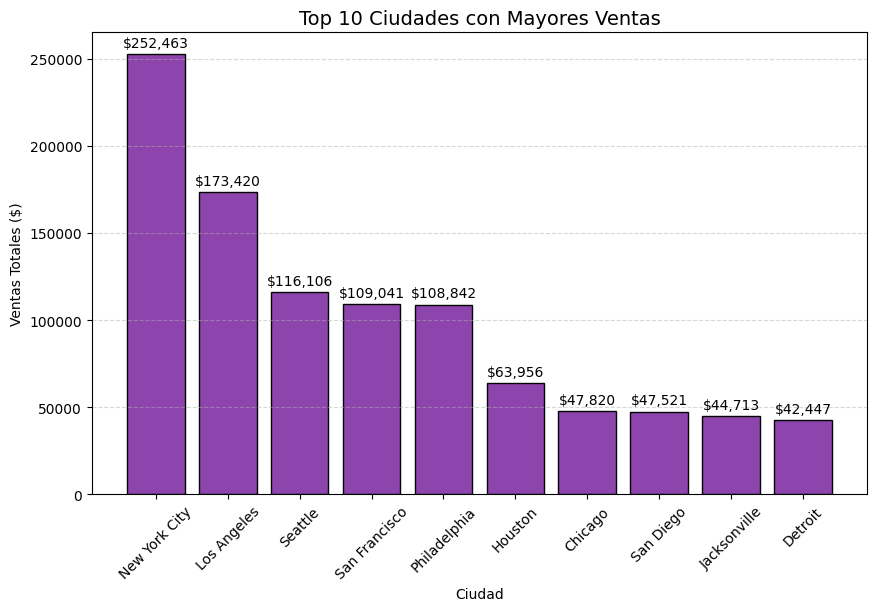

In [ ]:
# 1. Agrupar ventas por Ciudad y ordenar
top_ciudades = df.groupby('Ciudad')['Ventas'].sum().sort_values(ascending=False).head(10)

# 2. Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_ciudades.index, top_ciudades.values, color='#8E44AD', edgecolor='black') # Color morado

# Formato de moneda en las etiquetas
plt.bar_label(bars, fmt='${:,.0f}', padding=3)

plt.title("Top 10 Ciudades con Mayores Ventas", fontsize=14)
plt.xlabel("Ciudad")
plt.ylabel("Ventas Totales ($)")
plt.xticks(rotation=45) # Rotar nombres para que se lean bien
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

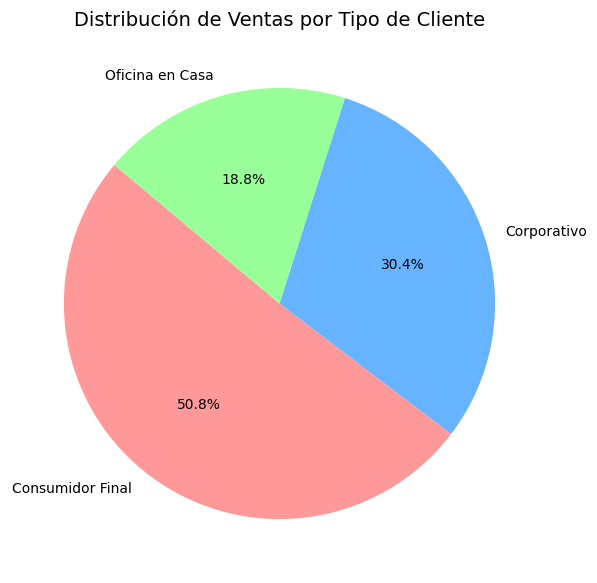

In [ ]:
ventas_por_segmento = df.groupby('Segmento')['Ventas'].sum()


etiquetas_espanol = []
for segmento in ventas_por_segmento.index:
    if segmento == 'Consumer': etiquetas_espanol.append('Consumidor Final')
    elif segmento == 'Corporate': etiquetas_espanol.append('Corporativo')
    elif segmento == 'Home Office': etiquetas_espanol.append('Oficina en Casa')
    else: etiquetas_espanol.append(segmento)

# 3. Crear el Gráfico de Pastel
plt.figure(figsize=(7, 7))
plt.pie(ventas_por_segmento,
        labels=etiquetas_espanol,
        autopct='%1.1f%%',  # Muestra el porcentaje con 1 decimal
        startangle=140,     # Gira el gráfico para que se vea estético
        colors=['#FF9999', '#66B3FF', '#99FF99']) # Colores pastel agradables

plt.title("Distribución de Ventas por Tipo de Cliente", fontsize=14)
plt.show()

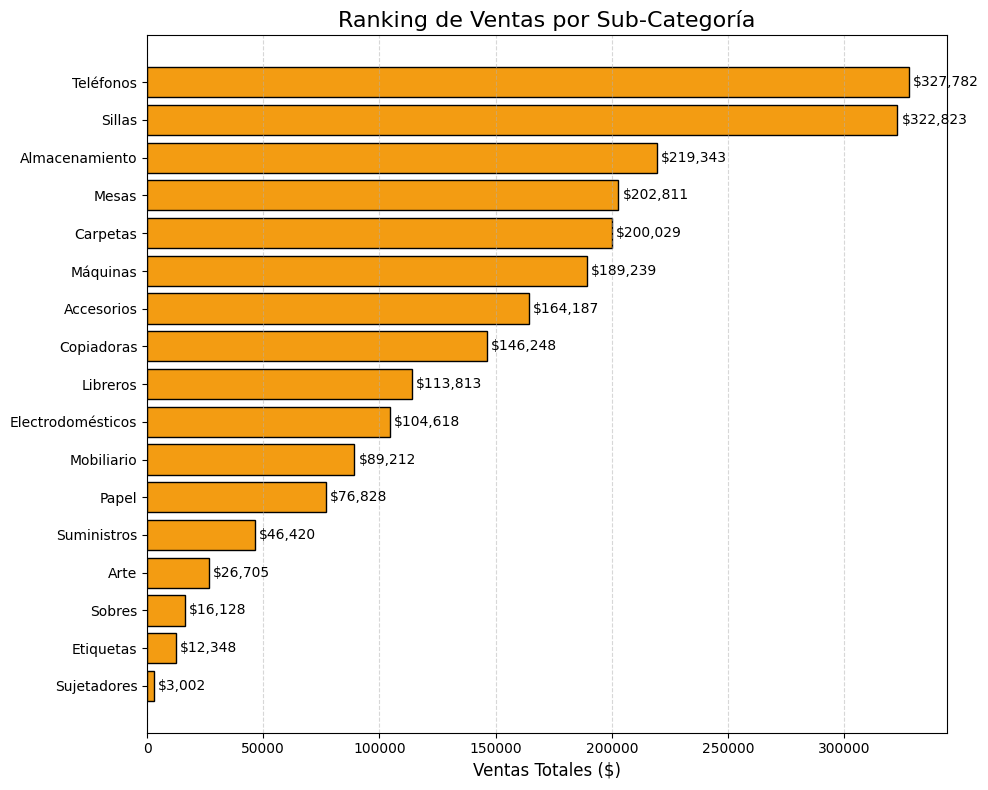

In [ ]:
import matplotlib.pyplot as plt

# 1. Agrupar ventas por Sub-Categoría
# Ordenamos de menor a mayor para que al graficar en horizontal, el más grande quede arriba
ventas_subcat = df.groupby('Sub_Categoria')['Ventas'].sum().sort_values(ascending=True)

# 2. Graficar
plt.figure(figsize=(10, 8)) # Hacemos el gráfico alto porque hay muchas subcategorías

# Barras horizontales (barh) color naranja
barras = plt.barh(ventas_subcat.index, ventas_subcat.values,
                  color='#F39C12', edgecolor='black')

# 3. Poner etiquetas de dinero
plt.bar_label(barras, fmt='${:,.0f}', padding=3, fontsize=10)

plt.title("Ranking de Ventas por Sub-Categoría", fontsize=16)
plt.xlabel("Ventas Totales ($)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

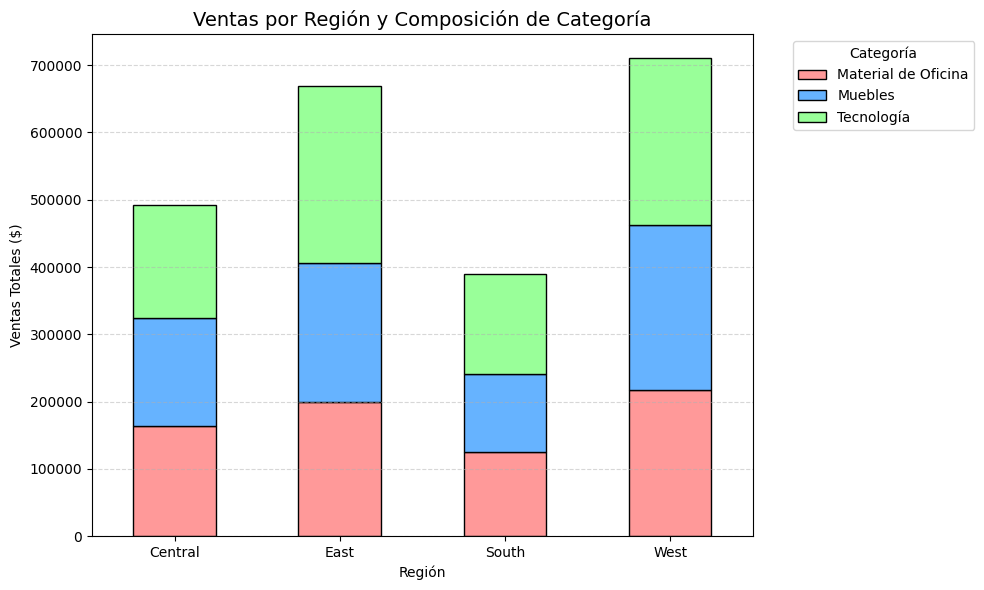

In [ ]:
# 1. Agrupar los datos: Ventas por Región y por Categoría
# El .unstack() es el truco para crear la tabla matricial que necesitamos
ventas_region = df.groupby(['Region', 'Categoria'])['Ventas'].sum().unstack()

# 2. Crear el gráfico
# kind='bar' es barras verticales
# stacked=True las apila una encima de otra en lugar de ponerlas al lado
ax = ventas_region.plot(kind='bar', stacked=True, figsize=(10, 6),
                        color=['#FF9999', '#66B3FF', '#99FF99'], edgecolor='black')

plt.title("Ventas por Región y Composición de Categoría", fontsize=14)
plt.xlabel("Región")
plt.ylabel("Ventas Totales ($)")
plt.xticks(rotation=0) # Dejar los nombres de regiones horizontales para leer mejor
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 3. Mover la leyenda fuera del gráfico para que no tape las barras
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# 1. Agrupar ventas por Estado (State)
ventas_estado = df.groupby('Estado')['Ventas'].sum().reset_index()

# Diccionario para mapear nombres de estados a abreviaturas (necesario para Plotly)
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Crear columna de código de estado
ventas_estado['Code'] = ventas_estado['Estado'].map(us_state_abbrev)

# 2. Crear el mapa
fig = px.choropleth(ventas_estado,
                    locations='Code', # Usa las abreviaturas (CA, NY, TX)
                    locationmode="USA-states",
                    color='Ventas',
                    scope="usa",
                    color_continuous_scale="Viridis", # Escala de colores moderna
                    title="Mapa de Calor de Ventas por Estado")

fig.show()

In [ ]:
!pip uninstall prophet -y
!pip install prophet cmdstanpy --upgrade

Found existing installation: prophet 1.2.1
Uninstalling prophet-1.2.1:
  Successfully uninstalled prophet-1.2.1
  Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.5 kB)
Using cached prophet-1.2.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (12.1 MB)


In [ ]:
import pandas as pd

# 1. Agrupar ventas por Mes (Inicio de Mes 'MS')
# Esto suma todas las ventas de enero, todas las de febrero, etc.
datos_prophet = df.set_index('Fecha_Pedido').resample('MS')['Ventas'].sum().reset_index()

# 2. Renombrar columnas obligatoriamente a 'ds' y 'y'
datos_prophet.columns = ['ds', 'y']

# 3. Ver cómo quedó
print("Datos listos para Prophet:")
print(datos_prophet.head())

Datos listos para Prophet:
          ds          y
0 2015-01-01  14205.707
1 2015-02-01   4519.892
2 2015-03-01  55205.797
3 2015-04-01  27906.855
4 2015-05-01  23644.303


In [ ]:
from prophet import Prophet

# 1. Crear el modelo
# (daily_seasonality=False porque trabajamos con meses)
modelo = Prophet(seasonality_mode='multiplicative', daily_seasonality=False)

# 2. Entrenar (Fit)
modelo.fit(datos_prophet)

# 3. Crear el futuro
# Le pedimos que genere fechas vacías para los próximos 12 meses (periods=12)
futuro = modelo.make_future_dataframe(periods=12, freq='MS')

# 4. Predecir
pronostico = modelo.predict(futuro)

# 5. Ver los resultados numéricos (últimos 5 meses predichos)
print(pronostico[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


           ds           yhat     yhat_lower     yhat_upper
55 2019-08-01   47687.982089   37490.612971   57945.215029
56 2019-09-01  105983.418528   95792.921273  116247.276172
57 2019-10-01   67189.927343   57352.709375   78290.380680
58 2019-11-01  124284.540139  114189.805386  134260.653491
59 2019-12-01   95834.908715   86339.019251  105564.194019


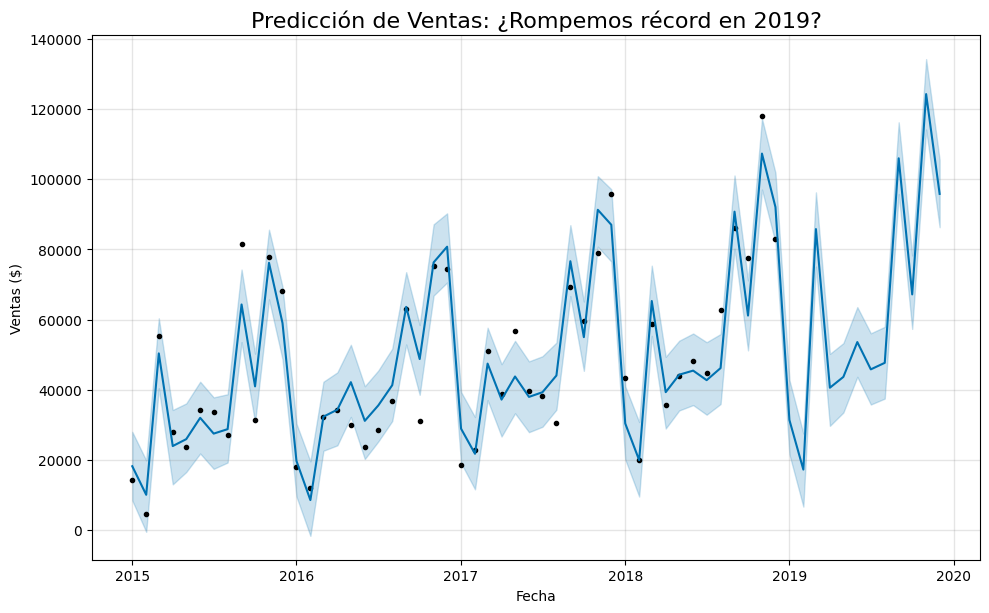

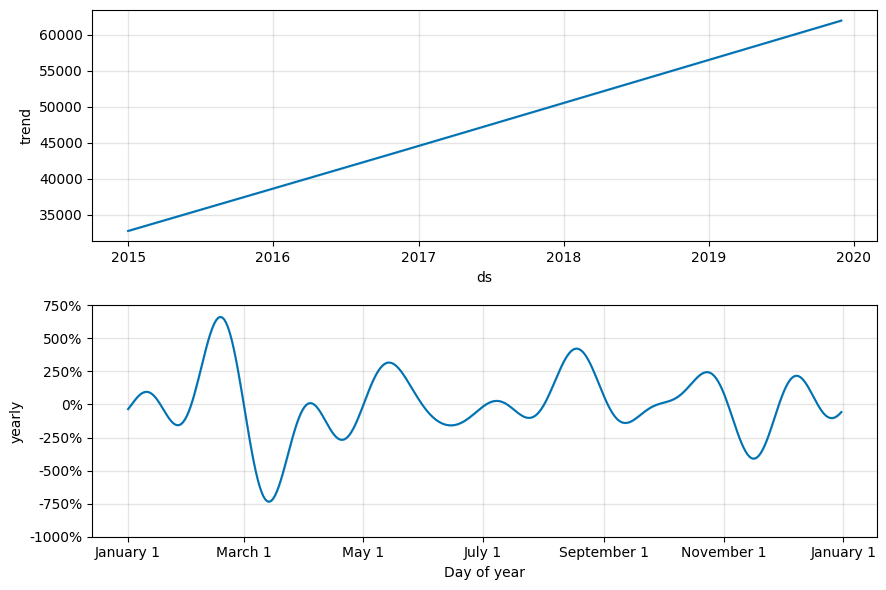

In [ ]:
# 1. Gráfico principal (Historia + Predicción)
fig1 = modelo.plot(pronostico)
plt.title("Predicción de Ventas: ¿Rompemos récord en 2019?", fontsize=16)
plt.xlabel("Fecha")
plt.ylabel("Ventas ($)")
plt.show()

# 2. Desglose de componentes (Para entender el comportamiento)
fig2 = modelo.plot_components(pronostico)
plt.show()